In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import pandas as pd
import seaborn as sns
import glob
import os
import re
from scipy.signal import savgol_filter
from skimage.measure import profile_line
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

def rastersstats_to_dict(dir):

    rstr_dict = {}
    file_list = glob.glob(str(dir) + '*.tif')

    for f in file_list:

        rstr_dict[f] = {}
        src = rasterio.open(f)
        rstr_dict[f]['arr'] = src.read(1)
        rstr_dict[f]['mu'] = np.nanmean(rstr_dict[f]['arr'])
        rstr_dict[f]['sigma'] = np.nanstd(rstr_dict[f]['arr'])
        rstr_dict[f]['CV'] = rstr_dict[f]['sigma'] / rstr_dict[f]['mu']
        rstr_dict[f]['year'] = re.findall('(\d{4})', f)

    return rstr_dict


d1 = rastersstats_to_dict('../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/')
d2 = rastersstats_to_dict('../thesis/fidelity_analysis/results/clpx_outcrops/2016_v._2017//')

d = {**d1, **d2}

In [2]:
print(d.keys())

dict_keys(['../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/clpx_snow_depth_outcrops_2013.tif', '../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/clpx_snow_depth_outcrops_2016.tif', '../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/clpx_snow_depth_outcrops_2018.tif', '../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/clpx_snow_depth_outcrops_2012.tif', '../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/clpx_snow_depth_outcrops_2015.tif', '../thesis/gis/raster/clpx/snow_depth/corrected/fidelity_subsets/clpx_outcrops/clpx_snow_depth_outcrops_2017.tif'])


In [3]:

#clpx_lake = recursive_rastersstats_to_dict('../../../similarity_results/clpx_lake_e/', r'*.tif')

sub = {}

interesting_keys = ['2017', '2016','ssim','nrmse','cwssim', 'gms']
for k in interesting_keys:
    for dk in d.keys():
        if k in dk:
            sub[dk.split('/')[-1][:-4]]=d[dk]
            


            
sub.keys()



dict_keys(['clpx_snow_depth_outcrops_2017', 'clpx_snow_depth_outcrops_2016'])

In [4]:
desired_order_list = ['clpx_snow_depth_outcrops_2016',
                      'clpx_snow_depth_outcrops_2017',
                      '2016_v._2017_nrmse_arr',
                      '2016_v._2017_ssim_arr',
                      '2016_v._2017_gms_arr',
                      '2016_v._2017_cwssim_arr']

reordered_dict = {k: sub[k] for k in desired_order_list}

KeyError: '2016_v._2017_nrmse_arr'

In [116]:
sub = reordered_dict.copy()

In [117]:
print(sub['clpx_snow_depth_outcrops_2016']['arr'].shape)

(510, 1350)


In [118]:
titles = ['2016 Depth (m)', '2017 Depth (m)','NRMSE','SSIM','GMS', 'CW-SSIM']
i = 0
for k in sub.keys():
    sub[k]['title']=titles[i]
    i+=1
            

In [119]:
sub

{'clpx_snow_depth_outcrops_2016': {'arr': array([[0.5784863 , 0.5616406 , 0.57213867, ..., 0.48473632, 0.5475415 ,
          0.5336255 ],
         [0.525874  , 0.51757324, 0.53393066, ..., 0.46935546, 0.43822753,
          0.4428662 ],
         [0.49431884, 0.4949292 , 0.49590576, ..., 0.39330566, 0.36724365,
          0.3631543 ],
         ...,
         [0.616084  , 0.61016357, 0.62853515, ..., 0.17748535, 0.13305175,
          0.13079345],
         [0.64831054, 0.6509961 , 0.6378125 , ..., 0.24212158, 0.15679443,
          0.16338623],
         [0.60003173, 0.62578857, 0.60424316, ..., 0.17626464, 0.18950927,
          0.15478027]], dtype=float32),
  'mu': 0.5393495,
  'sigma': 0.2637667,
  'CV': 0.48904598,
  'year': ['2016'],
  'title': '2016 Depth (m)'},
 'clpx_snow_depth_outcrops_2017': {'arr': array([[0.6142944 , 0.61539304, 0.62357175, ..., 0.78781736, 0.8441528 ,
          0.83603513],
         [0.5904907 , 0.6091064 , 0.6185669 , ..., 0.74558103, 0.71799314,
          0.72269

In [126]:
#row, col

north_src = (280, 450)
north_dst = (120, 450)

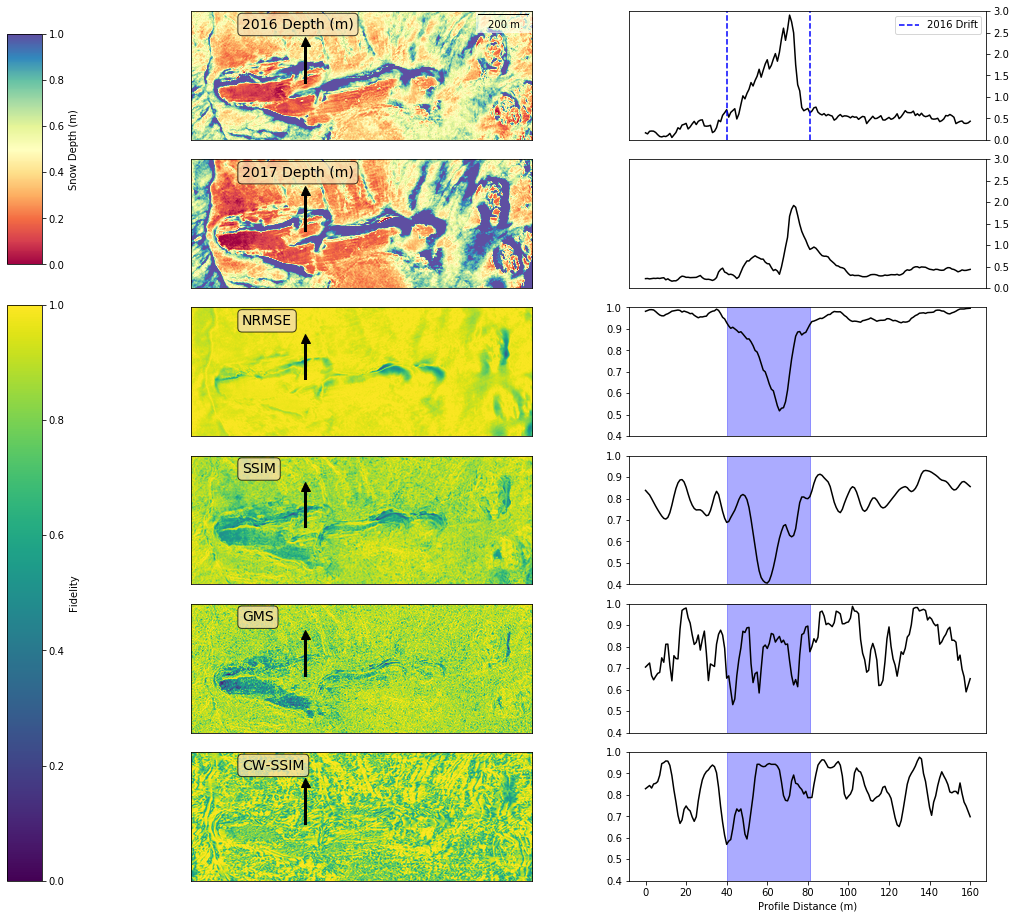

In [148]:

f, axes = plt.subplots(6, 2, gridspec_kw = {'width_ratios':[1.5, 1]}, figsize=(16,16))
i = 0

for k in sub.keys():


    # Plot the snow depth and IQA Arrays with annotations
    im = axes[i][0].imshow(sub[k]['arr'], interpolation='lanczos', vmin=0.0, vmax=1, cmap='Blues')
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
    axes[i][0].text(0.15, 0.95, sub[k]['title'], transform=axes[i][0].transAxes,
                    fontsize=14, verticalalignment='top', bbox=props)

    # Plot the two transect lines over top each array
    
    north_line = profile_line(sub[k]['arr'], north_src, north_dst)
    
    axes[i][0].plot((north_src[1], north_dst[1]),
                    (north_src[0], north_dst[0]),
                    color='k', lw=3)
    
    axes[i][0].plot(north_dst[1], north_dst[0],
                    color='k', marker='^', markersize=9)
    
    # Isolate drift chunks using 0.65 m threshold
    if i == 0:
        im = axes[i][0].imshow(sub[k]['arr'], interpolation='lanczos', vmin=0.0, vmax=1, cmap='Spectral')
    
        n16sup_thresh_indices = [idx for idx in range(len(north_line)) if north_line[idx] > 0.65]
        n16sub_thresh_indices = [idx for idx in range(len(north_line)) if north_line[idx] <= 0.65]
        north_drift_start_16 = n16sup_thresh_indices[0]
        north_drift_end_16 = [x for x in n16sub_thresh_indices if x > north_drift_start_16][4]
        axes[i][1].set_ylim([0, 3.0])
        scalebar = ScaleBar(1, box_alpha=0.5) # 1 pixel = 1 meter
        axes[i][0].add_artist(scalebar)


    if i == 1:
        im = axes[i][0].imshow(sub[k]['arr'], interpolation='lanczos', vmin=0.0, vmax=1, cmap='Spectral')

        n17sup_thresh_indices = [idx for idx in range(len(north_line)) if north_line[idx] > 0.70]
        n17sub_thresh_indices = [idx for idx in range(len(north_line)) if north_line[idx] <= 0.70]
        north_drift_start_17 = n17sup_thresh_indices[0]
        north_drift_end_17 = [x for x in n17sub_thresh_indices if x > north_drift_start_17][4]
        axes[i][1].set_ylim([0, 3.0])

        
    if i != 5:
        axes[i][0].get_shared_x_axes().join(axes[5][0], axes[i][0])
        axes[i][1].get_shared_x_axes().join(axes[5][1], axes[i][1])
        axes[i][1].set_xticks([])

    
    if i >= 2:
        im2 = axes[i][0].imshow(sub[k]['arr'], interpolation='lanczos', vmin=0.0, vmax=1, cmap='viridis')

        axes[i][1].plot(savgol_filter(north_line, 5, 1), color='k')
        axes[i][1].yaxis.tick_left()

    else:
        axes[i][1].plot(north_line, color='k')
        axes[i][1].yaxis.tick_right()

    
    if i > 1:
        axes[i][1].set_ylim([0.4, 1.0])
        axes[i][1].axvspan(north_drift_start_16, north_drift_end_16, alpha=0.33, color='b')
#         axes[i][1].axvspan(north_drift_end_17, north_drift_end_17, alpha=0.33, color='y')
#        axes[i][1].axvspan(north_drift_start_16, north_drift_end_16, alpha=0.33, color='green')

        
    if i == 5:
        axes[i][1].set_xlabel('Profile Distance (m)')
    
    axes[i][0].set_yticks([])
    axes[i][0].set_xticks([])
    
    i+=1

axes[0][1].axvline(x=north_drift_start_16, color='blue', ls='--',
                  label='2016 Drift') 
axes[0][1].axvline(x=north_drift_end_16, color='blue', ls='--')

axes[0][1].legend()

f.subplots_adjust(hspace=0.15, wspace=0)
mp = axes[0][0].get_children()[-2]
cax = f.add_axes([0.05, 0.66, 0.03, 0.2])
cbar=plt.colorbar(mappable=mp, cax=cax,
                  ticks = ([0, 0.2, 0.4, 0.6, 0.8, 1.0]),
                  orientation='vertical')
cbar.set_label('Snow Depth (m)')
cbar.ax.set_xticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '>1.0'])
cax2 = f.add_axes([0.05, 0.125, 0.03, 0.5])
cbar2 = plt.colorbar(mappable=im2, cax=cax2,
                  ticks = ([0, 0.2, 0.4, 0.6, 0.8, 1.0]),
                  orientation='vertical')
cbar2.set_label('Fidelity')
cbar2.ax.set_xticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])

plt.savefig('f19_drift_scour_fidelity_profiles_300.png', dpi=300, bbox_inches='tight')

plt.savefig('f19_drift_scour_fidelity_profiles_600.png', dpi=600, bbox_inches='tight')
